# Usage (quickest version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
from pprint import pprint

In [4]:
import covsirphy as cs
cs.__version__

'2.8.3'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [5]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)

Note:  
Datasets were retrieved via [COVID-19 Data Hub](https://covid19datahub.io/https://covid19datahub.io/) and the citation is  
Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

Scenario analysis can be performed for the following countries.

In [6]:
pprint(set(jhu_data.countries()) & set(population_data.countries()), compact=True)

{

'Afghanistan'

, 

'Albania'

, 

'Algeria'

, 

'Andorra'

, 

'Angola'

,
 

'Antigua and Barbuda'

, 

'Argentina'

, 

'Armenia'

, 

'Australia'

, 

'Austria'

,
 

'Azerbaijan'

, 

'Bahamas'

, 

'Bahrain'

, 

'Bangladesh'

, 

'Barbados'

, 

'Belarus'

,
 

'Belgium'

, 

'Belize'

, 

'Benin'

, 

'Bermuda'

, 

'Bhutan'

, 

'Bolivia'

,
 

'Bosnia and Herzegovina'

, 

'Botswana'

, 

'Brazil'

, 

'Brunei'

, 

'Bulgaria'

,
 

'Burkina Faso'

, 

'Burundi'

, 

'Cambodia'

, 

'Cameroon'

, 

'Canada'

, 

'Cape Verde'

,
 

'Central African Republic'

, 

'Chad'

, 

'Chile'

, 

'China'

, 

'Colombia'

, 

'Comoros'

,
 

'Congo'

, 

'Costa Atlantica'

, 

'Costa Rica'

, 

'Croatia'

, 

'Cuba'

, 

'Cyprus'

,
 

'Czech Republic'

, 

'Denmark'

, 

'Djibouti'

, 

'Dominica'

, 

'Dominican Republic'

,
 

'Ecuador'

, 

'Egypt'

, 

'El Salvador'

, 

'Equatorial Guinea'

, 

'Eritrea'

, 

'Estonia'

,
 

'Ethiopia'

, 

'Fiji'

, 

'Finland'

, 

'France'

, 

'Gabon'

, 

'Gambia'

, 

'Georgia'

,
 

'Germany'

, 

'Ghana'

, 

'Greece'

, 

'Grenada'

, 

'Guatemala'

, 

'Guinea'

,
 

'Guinea-Bissau'

, 

'Guyana'

, 

'Haiti'

, 

'Holy See'

, 

'Honduras'

, 

'Hungary'

,
 

'Iceland'

, 

'India'

, 

'Indonesia'

, 

'Iran'

, 

'Iraq'

, 

'Ireland'

, 

'Israel'

, 

'Italy'

,
 

'Ivory Coast'

, 

'Jamaica'

, 

'Japan'

, 

'Jordan'

, 

'Kazakhstan'

, 

'Kenya'

,
 

'Korea, South'

, 

'Kosovo'

, 

'Kuwait'

, 

'Kyrgyzstan'

, 

'Laos'

, 

'Latvia'

, 

'Lebanon'

,
 

'Lesotho'

, 

'Liberia'

, 

'Libya'

, 

'Liechtenstein'

, 

'Lithuania'

, 

'Luxembourg'

,
 

'Macedonia'

, 

'Madagascar'

, 

'Malawi'

, 

'Malaysia'

, 

'Maldives'

, 

'Mali'

, 

'Malta'

,
 

'Mauritania'

, 

'Mauritius'

, 

'Mexico'

, 

'Moldova'

, 

'Monaco'

, 

'Mongolia'

,
 

'Montenegro'

, 

'Morocco'

, 

'Mozambique'

, 

'Myanmar'

, 

'Namibia'

, 

'Nepal'

,
 

'Netherlands'

, 

'New Zealand'

, 

'Nicaragua'

, 

'Niger'

, 

'Nigeria'

, 

'Norway'

,
 

'Oman'

, 

'Pakistan'

, 

'Palestine'

, 

'Panama'

, 

'Papua New Guinea'

, 

'Paraguay'

,
 

'Peru'

, 

'Philippines'

, 

'Poland'

, 

'Portugal'

, 

'Qatar'

, 

'Romania'

, 

'Russia'

,
 

'Rwanda'

, 

'Saint Kitts and Nevis'

, 

'Saint Lucia'

,
 

'Saint Vincent and the Grenadines'

, 

'San Marino'

, 

'Sao Tome and Principe'

,
 

'Saudi Arabia'

, 

'Senegal'

, 

'Serbia'

, 

'Seychelles'

, 

'Sierra Leone'

, 

'Singapore'

,
 

'Slovakia'

, 

'Slovenia'

, 

'Somalia'

, 

'South Africa'

, 

'South Sudan'

, 

'Spain'

,
 

'Sri Lanka'

, 

'Sudan'

, 

'Suriname'

, 

'Swaziland'

, 

'Switzerland'

, 

'Syria'

,
 

'Taiwan'

, 

'Tajikistan'

, 

'Tanzania'

, 

'Thailand'

, 

'Timor-Leste'

, 

'Togo'

,
 

'Trinidad and Tobago'

, 

'Tunisia'

, 

'Turkey'

, 

'UK'

, 

'Uganda'

, 

'Ukraine'

,
 

'United Arab Emirates'

, 

'United States'

, 

'Uruguay'

, 

'Uzbekistan'

, 

'Venezuela'

,
 

'Vietnam'

, 

'Western Sahara'

, 

'Yemen'

, 

'Zambia'

, 

'Zimbabwe'

}

## Start scenario analysis
As an example, we will analysis the number of cases in Italy.

In [7]:
scenario = cs.Scenario(jhu_data, population_data, country="Italy")

## Check records

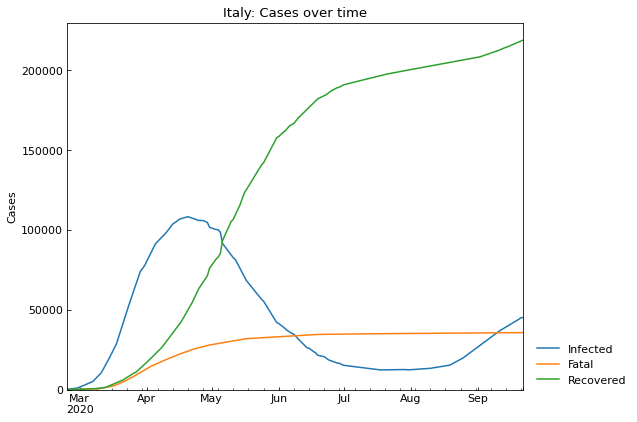

In [8]:
_ = scenario.records()

## S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters.

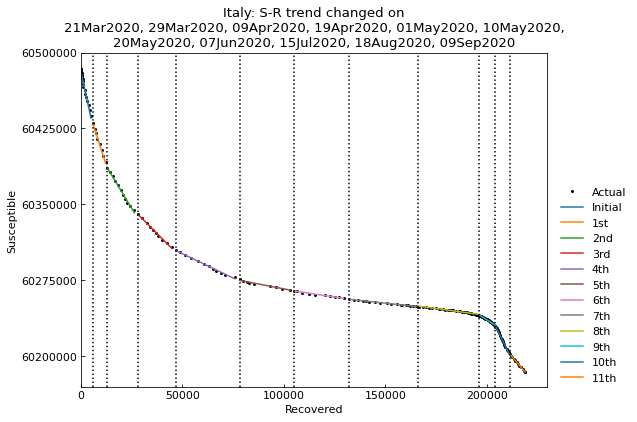

In [9]:
scenario.trend()

In [10]:
scenario.summary()

,Type,Start,End,Population
0th,Past,24Feb2020,20Mar2020,60483973
1st,Past,21Mar2020,28Mar2020,60483973
2nd,Past,29Mar2020,08Apr2020,60483973
3rd,Past,09Apr2020,18Apr2020,60483973
4th,Past,19Apr2020,30Apr2020,60483973
5th,Past,01May2020,09May2020,60483973
6th,Past,10May2020,19May2020,60483973
7th,Past,20May2020,06Jun2020,60483973
8th,Past,07Jun2020,14Jul2020,60483973
9th,Past,15Jul2020,17Aug2020,60483973


## Hyperparameter estimation of ODE models
As an example, use SIR-F model.

In [11]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	11th phase (09Sep2020 - 22Sep2020): finished  503 trials in 0 min 15 sec

	3rd phase (09Apr2020 - 18Apr2020): finished  392 trials in 0 min 10 sec

	4th phase (19Apr2020 - 30Apr2020): finished  410 trials in 0 min 10 sec

	5th phase (01May2020 - 09May2020): finished  691 trials in 0 min 20 sec

	6th phase (10May2020 - 19May2020): finished  206 trials in 0 min  5 sec

	7th phase (20May2020 - 06Jun2020): finished  381 trials in 0 min 10 sec

	1st phase (21Mar2020 - 28Mar2020): finished 1756 trials in 1 min  0 sec

	0th phase (24Feb2020 - 20Mar2020): finished 1700 trials in 1 min  0 sec

	2nd phase (29Mar2020 - 08Apr2020): finished 1744 trials in 1 min  0 sec

	8th phase (07Jun2020 - 14Jul2020): finished  415 trials in 0 min 10 sec

	9th phase (15Jul2020 - 17Aug2020): finished 1966 trials in 1 min  0 sec

	10th phase (18Aug2020 - 08Sep2020): finished 1985 trials in 1 min  0 sec

Completed optimization. Total: 2 min 16 sec

## Show the history of reproduction number

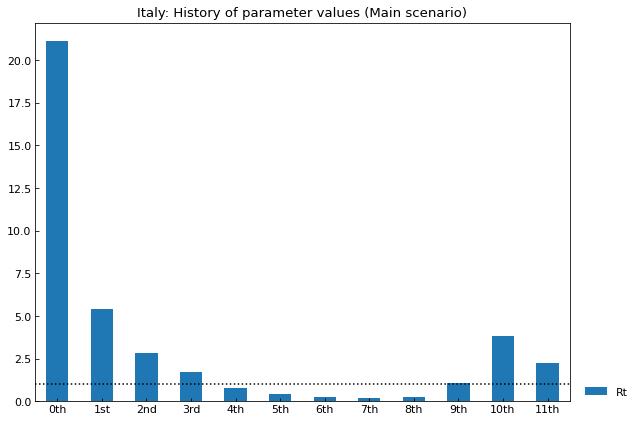

In [12]:
_ = scenario.param_history(targets=["Rt"], divide_by_first=False)

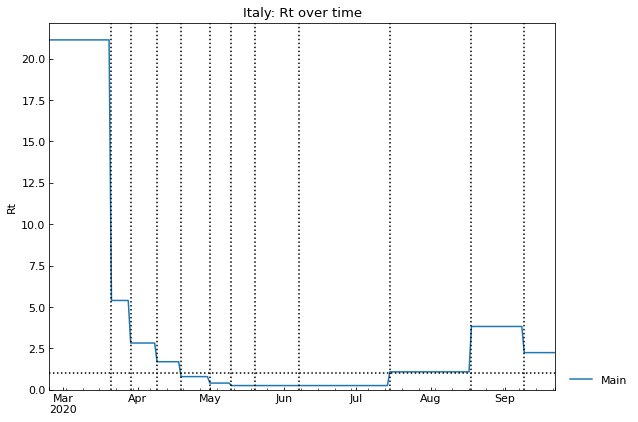

In [13]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

## Simulate the number of cases

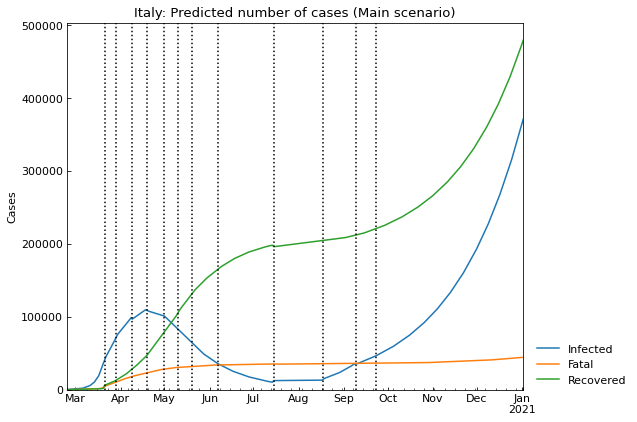

In [14]:
scenario.add(end_date="01Jan2021")
_ = scenario.simulate()